# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import math
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Directory
output_data_loc = "../output_data"

# Output File (CSV)
output_data_file = f"{output_data_loc}/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
cities = []

def buildCityList() :
    # List for holding lat_lngs and cities
    lat_lngs = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

buildCityList()

if len(cities) < 500:
    buildCityList()

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# The free version of the openweathermap api allows for max 60 requests per minute, so we need to chunk our cities list
# into sets of < 60 per set to safely make calls 1 set per minute to ensure the requets get fullfiled and our account
# doesn't get suspended.  Fire this off and GO GRAB A COFFEE because it will take a minimum of 1 minute per set and there are
# ususally around 13 sets to process

def splitListBySize(listToSplit, size):
     lst = []
     while len(listToSplit) > size:
         chunk = listToSplit[:size]
         lst.append(chunk)
         listToSplit = listToSplit[size:]
     lst.append(listToSplit)
     return lst

city_sets = splitListBySize(cities,50)

# base url for request
base_url = "http://api.openweathermap.org/data/2.5/weather"

# params for request
params = {
"units":"imperial",
"appid":weather_api_key
}

# list for weather data retrieved from API calls
weather_data_cities = []

print('Beginning Data Retrieval\n------------------------------')

city_sets_upperBound = (len(city_sets)-1)

for set_idx, city_set in enumerate(city_sets):    
    
    # perf counter to track the start of each batch
    tic = time.perf_counter()
    
    for record_idx, city in enumerate(city_set):
        print(f'Processing Record {record_idx} of Set {set_idx} | {city}')
        
        # Add the city to the query params for the request
        params['q'] = city
        
        # Make the request
        response = requests.get(url=base_url, params=params).json()
        
        try:
            name = response['name']
        
            # add the response to a list 
            weather_data_cities.append(response)
        except:
            print('City not found. Skipping...')
            pass        
    
    # perf counter to get the end of the batch requests
    toc = time.perf_counter()
    
    # if toc is > 1 min since tic, go ahead and iterate, otherwise wait whatever duration is left 
    # between 1 min and the elapsed time
    
    elapsedTime = toc - tic
    
    if set_idx < city_sets_upperBound:    
        if elapsedTime <= 60 :
            timeToWait = (60 - elapsedTime)
            print(f'waiting {timeToWait} seconds before next batch...')
            time.sleep(timeToWait)
            print('Resuming...')
    else:
        print('All cities processed!')


Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 0 | isangel
Processing Record 1 of Set 0 | polewali
Processing Record 2 of Set 0 | grand gaube
Processing Record 3 of Set 0 | anadyr
Processing Record 4 of Set 0 | puerto ayora
Processing Record 5 of Set 0 | lincoln
Processing Record 6 of Set 0 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 0 | albany
Processing Record 8 of Set 0 | hobart
Processing Record 9 of Set 0 | ushuaia
Processing Record 10 of Set 0 | saskylakh
Processing Record 11 of Set 0 | jamestown
Processing Record 12 of Set 0 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 0 | victoria
Processing Record 14 of Set 0 | merauke
Processing Record 15 of Set 0 | punta arenas
Processing Record 16 of Set 0 | port-gentil
Processing Record 17 of Set 0 | hasaki
Processing Record 18 of Set 0 | berlevag
Processing Record 19 of Set 0 | laguna
Processing Record 20 of Set 0 | beringovskiy
Processing Record 21 of Set 0

Processing Record 35 of Set 3 | cherskiy
Processing Record 36 of Set 3 | sept-iles
Processing Record 37 of Set 3 | los llanos de aridane
Processing Record 38 of Set 3 | bengkulu
Processing Record 39 of Set 3 | coquimbo
Processing Record 40 of Set 3 | telhara
Processing Record 41 of Set 3 | airai
Processing Record 42 of Set 3 | cape town
Processing Record 43 of Set 3 | aksarka
Processing Record 44 of Set 3 | phrai bung
City not found. Skipping...
Processing Record 45 of Set 3 | faya
Processing Record 46 of Set 3 | longyearbyen
Processing Record 47 of Set 3 | bambous virieux
Processing Record 48 of Set 3 | kaitangata
Processing Record 49 of Set 3 | ongandjera
waiting 47.71269779998693 seconds before next batch...
Resuming...
Processing Record 0 of Set 4 | castro
Processing Record 1 of Set 4 | east london
Processing Record 2 of Set 4 | matara
Processing Record 3 of Set 4 | kandrian
Processing Record 4 of Set 4 | zalantun
Processing Record 5 of Set 4 | tres palos
Processing Record 6 of Set

Processing Record 18 of Set 7 | karasjok
Processing Record 19 of Set 7 | ardakan
Processing Record 20 of Set 7 | veraval
Processing Record 21 of Set 7 | qasigiannguit
Processing Record 22 of Set 7 | komsomolskiy
Processing Record 23 of Set 7 | yarada
Processing Record 24 of Set 7 | torbay
Processing Record 25 of Set 7 | nizhneyansk
City not found. Skipping...
Processing Record 26 of Set 7 | olinda
Processing Record 27 of Set 7 | warqla
City not found. Skipping...
Processing Record 28 of Set 7 | zyryanka
Processing Record 29 of Set 7 | kracheh
City not found. Skipping...
Processing Record 30 of Set 7 | kyra
Processing Record 31 of Set 7 | yaan
Processing Record 32 of Set 7 | byron bay
Processing Record 33 of Set 7 | hirado
Processing Record 34 of Set 7 | tromso
Processing Record 35 of Set 7 | campbeltown
Processing Record 36 of Set 7 | sataua
City not found. Skipping...
Processing Record 37 of Set 7 | ngukurr
City not found. Skipping...
Processing Record 38 of Set 7 | riyadh
Processing 

Processing Record 3 of Set 11 | tautira
Processing Record 4 of Set 11 | balaka
Processing Record 5 of Set 11 | virginia beach
Processing Record 6 of Set 11 | khamgaon
Processing Record 7 of Set 11 | melnikovo
Processing Record 8 of Set 11 | nara
Processing Record 9 of Set 11 | codajas
Processing Record 10 of Set 11 | santa fe
Processing Record 11 of Set 11 | port hueneme
Processing Record 12 of Set 11 | xihe
Processing Record 13 of Set 11 | aswan
Processing Record 14 of Set 11 | dutlwe
Processing Record 15 of Set 11 | laranjeiras do sul
Processing Record 16 of Set 11 | uba
Processing Record 17 of Set 11 | honningsvag
Processing Record 18 of Set 11 | batagay-alyta
Processing Record 19 of Set 11 | swan hill
Processing Record 20 of Set 11 | gualan
Processing Record 21 of Set 11 | saint-augustin
Processing Record 22 of Set 11 | llanes
Processing Record 23 of Set 11 | chicama
Processing Record 24 of Set 11 | cap malheureux
Processing Record 25 of Set 11 | gravdal
Processing Record 26 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Now build a list of only the data we want to work with from the json
weather_data_list = []

for city in weather_data_cities:
    weather_data_dict = {}
    weather_data_dict['City'] = city['name']
    weather_data_dict['Lat'] = city['coord']['lat']
    weather_data_dict['Lng'] = city['coord']['lon']
    weather_data_dict['Max Temp'] = city['main']['temp_max']
    weather_data_dict['Humidity'] = city['main']['humidity']
    weather_data_dict['Cloudiness'] = city['clouds']['all']
    weather_data_dict['Wind Speed'] = city['wind']['speed']
    weather_data_dict['Country'] = city['sys']['country']
    weather_data_dict['Date'] = city['dt']
    weather_data_list.append(weather_data_dict)

# Convert to DataFrame
city_weather_df = pd.DataFrame(weather_data_list)

# Export the city data into a .csv
city_weather_df.to_csv(output_data_file)

# Display the DataFrame 
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isangel,-19.5500,169.2667,69.48,81,45,8.52,VU,1632765468
1,Polewali,-3.4324,119.3435,76.05,89,71,3.36,ID,1632765694
2,Grand Gaube,-20.0064,57.6608,72.37,71,3,8.99,MU,1632765490
3,Anadyr,64.7500,177.4833,35.01,80,81,5.99,RU,1632765694
4,Puerto Ayora,-0.7393,-90.3518,70.20,86,96,10.00,EC,1632765694


In [5]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.985593,20.972840,66.018615,69.107914,53.519784,8.133633,1.632766e+09
std,33.549889,89.406680,18.711264,21.910939,38.247388,5.759129,2.280427e+02
min,-54.800000,-179.166700,16.610000,6.000000,0.000000,0.000000,1.632765e+09
25%,-8.654850,-52.827225,54.767500,58.750000,13.000000,3.845000,1.632766e+09
50%,24.693850,25.893550,70.755000,75.000000,58.500000,6.910000,1.632766e+09
75%,48.602875,98.133850,79.360000,85.000000,91.000000,10.897500,1.632766e+09
max,78.218600,179.316700,108.300000,100.000000,100.000000,35.680000,1.632766e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Build the data frame to be used to genereate plots.  Set it up so that every time the api's are called to get a
# new set of city data it will automatically remove records with humidity > 100 and proceed

humidity_count = city_weather_df.loc[city_weather_df['Humidity']>100, 'Humidity'].count()

# if the count is > 0, remove those records
if humidity_count > 0:
    print(f"There were {humidity_count} records in this set that had > 100% humidity so removing them from the set...")
    clean_city_data_df = city_weather_df.loc[city_weather_df['Humidity']<=100]    
else:
    print("No cities in this set had > 100% humidity so skipping...")
    clean_city_data_df = city_weather_df

No cities in this set had > 100% humidity so skipping...


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

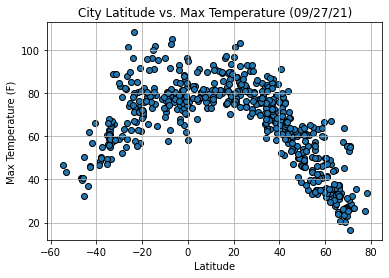

In [9]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Max Temp"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_MaxTemp_InWorldCities.png")

# Show plot
plt.show()

<h3>Observation</h3>
<p>The Latitude vs. Temperature Plot above shows that as a city approaches the latitude of the equator, the temperature rises.</p>

## Latitude vs. Humidity Plot

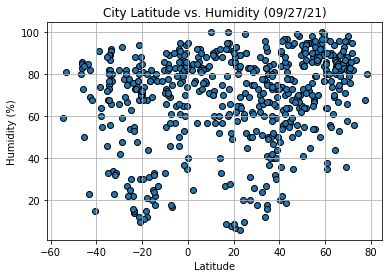

In [10]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Humidity"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Humidity ({today.strftime('%m/%d/%y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_Humidity_InWorldCities.png")

# Show plot
plt.show()

<h3>Observation</h3>
<p>The Latitude vs. Humidity Plot above shows that there does not seem to be any overly meaninful correlation between latitude and humidity regarding proximity to the equator. This dataset does seem to show that the majority of the cities have humidity between 60% and 100% and it could be inferred that cites above the equator potentially have more of a chance of having higher humidity than those beneath the equator given the clustering between 60% and 100% above the the equator.</p>

## Latitude vs. Cloudiness Plot

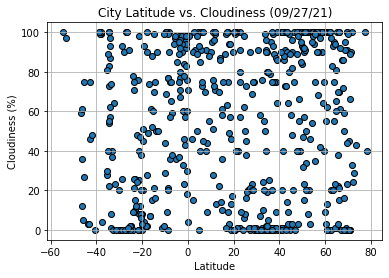

In [11]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Cloudiness"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_Cloudiness_InWorldCities.png")

# Show plot
plt.show()

<h3>Observation</h3>
<p>The Latitude vs. Cloudiness Plot above also doesn't seem to have a very meaningful correlation regarding proximity to the equator, however it does show that many cities either have very little cloudiness or alot of cloudiness with clustering between 80 - 100% and 0 to 20%.</p>

## Latitude vs. Wind Speed Plot

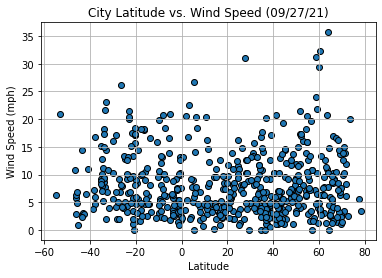

In [12]:
# Scatter plot with border around marker
plt.scatter(clean_city_data_df["Lat"], clean_city_data_df["Wind Speed"], edgecolors='k')

# Label
today = date.today()
plt.title(f"City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save to image file
plt.savefig(f"{output_data_loc}/Lat_vs_WindSpeed_InWorldCities.png")

# Show plot
plt.show()

<h3>Observation</h3>
<p>The Latitude vs. Wind Speed Plot does somewhat show that for some cities moving away from the equator means a higher wind speed. It does however show that the majority of cities in this set have lower windspeeds regardless of proximity to the equator with the majority all clustering between 0 and 15 mph.</p>

## Linear Regression

In [13]:
# Create data frames for Northern and Southern Hemisphere processing
northern_city_weather_df = clean_city_data_df.loc[(city_weather_df["Lat"]>=0)]
southern_city_weather_df = clean_city_data_df.loc[(city_weather_df["Lat"]<=0)]

# function to calculate linear regression values and return them along with the line equation after printing the r value
def calcLinregress(x_vals, y_vals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    return regress_values, line_eq

# function to genereate scatter plot showing linear regression, and save to file
def generateScatterPlot(x_vals, y_vals, regress_values, x_annotate, y_annotate, title, xlabel, ylabel, file_path):
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals,regress_values,"r-")
    plt.annotate(ln_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.savefig(file_path)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8492979927488693


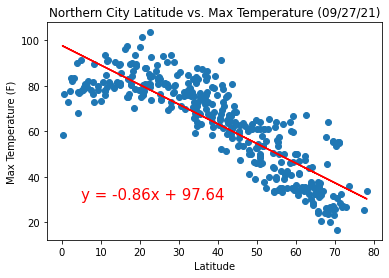

In [14]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Max Temp"])

# Render the plot
generateScatterPlot(
    northern_city_weather_df["Lat"],
    northern_city_weather_df["Max Temp"],
    reg_vals,
    5,
    30,
    f"Northern City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Max Temperature (F)",
    f"{output_data_loc}/Max_Temp_vs_Lat_LinearRegression_NH.png"
)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.644037556900941


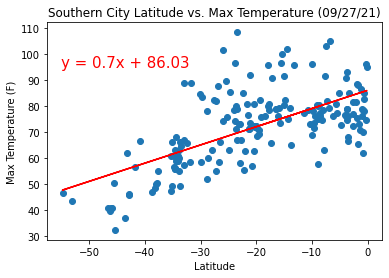

In [16]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Max Temp"])

# Render the plot
generateScatterPlot(
    southern_city_weather_df["Lat"],
    southern_city_weather_df["Max Temp"],
    reg_vals,
    -55,
    95,
    f"Southern City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Max Temperature (F)",
    f"{output_data_loc}/Max_Temp_vs_Lat_LinearRegression_SH.png"
)

<h3>Max Temp vs. Latitude Linear Regression Observation</h3> 
<p>These 2 plots above show the same relationship between latitude and temperature in an inverted manner forming a peak at the equator.  As you get closer to the equator, the temperature rises. There is a strong positive correlation based on the r value approaching 1.</p>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1787631484888518


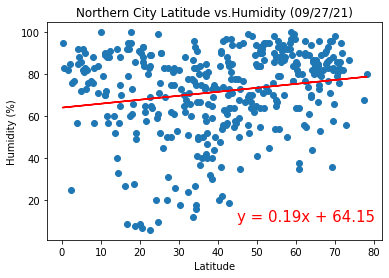

In [17]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Humidity"])

# Render the plot
generateScatterPlot(
    northern_city_weather_df["Lat"],
    northern_city_weather_df["Humidity"],
    reg_vals,
    45,
    10,
    f"Northern City Latitude vs.Humidity ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Humidity (%)",
    f"{output_data_loc}/Humidity_vs_Lat_LinearRegression_NH.png"
)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04144714861545442


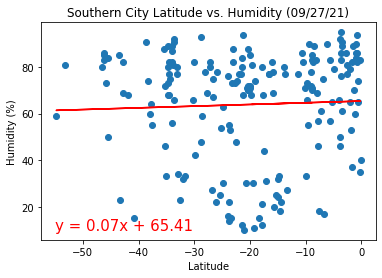

In [18]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Humidity"])

# Render the plot
generateScatterPlot(
    southern_city_weather_df["Lat"],
    southern_city_weather_df["Humidity"],
    reg_vals,
    -55,
    10,
    f"Southern City Latitude vs. Humidity ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Humidity (%)",
    f"{output_data_loc}/Humidity_vs_Lat_LinearRegression_SH.png"
)

<h3>Humidity (%) vs. Latitude Linear Regression Observation</h3>
<p>These plots show that humidity slightly rises as you go north of the equator and drops as you go south of the equator.</p>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04172830291123266


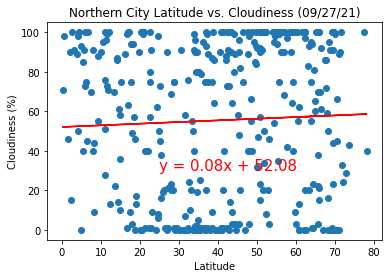

In [19]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Cloudiness"])

# Render the plot
generateScatterPlot(
    northern_city_weather_df["Lat"],
    northern_city_weather_df["Cloudiness"],
    reg_vals,
    25,
    30,
    f"Northern City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Cloudiness (%)",
    f"{output_data_loc}/Cloudiness_vs_Lat_LinearRegression_NH.png"
)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19732312302132476


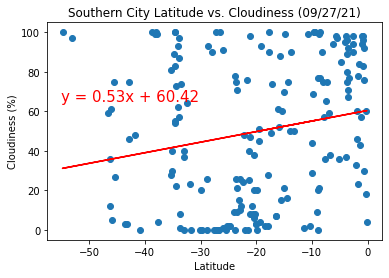

In [21]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Cloudiness"])

# Render the plot
generateScatterPlot(
    southern_city_weather_df["Lat"],
    southern_city_weather_df["Cloudiness"],
    reg_vals,
    -55,
    65,
    f"Southern City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Cloudiness (%)",
    f"{output_data_loc}/Cloudiness_vs_Lat_LinearRegression_SH.png"
)

<h3>Cloudiness (%) vs. Latitude Linear Regression Observation</h3>
<p>These 2 plots show that Cloudiness appears to similarily follow the regression path humidity does as it rises as you go north and drops as you go south, although the drop in cloudiness as you go south is more pronounced compaired to humidity.</p>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08426591621340283


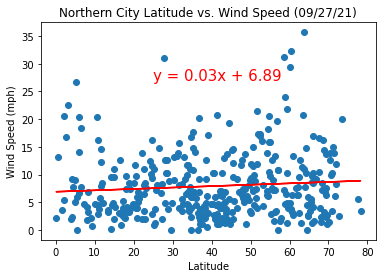

In [22]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(northern_city_weather_df["Lat"], northern_city_weather_df["Wind Speed"])

# Render the plot
generateScatterPlot(
    northern_city_weather_df["Lat"],
    northern_city_weather_df["Wind Speed"],
    reg_vals,
    25,
    27,
    f"Northern City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Wind Speed (mph)",
    f"{output_data_loc}/WindSpeed_vs_Lat_LinearRegression_NH.png"
)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13256120735081314


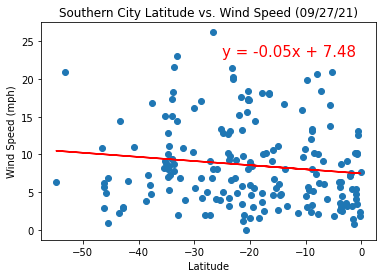

In [25]:
# Calculate regression values and the line equation
reg_vals, ln_eq = calcLinregress(southern_city_weather_df["Lat"], southern_city_weather_df["Wind Speed"])

# Render the plot
generateScatterPlot(
    southern_city_weather_df["Lat"],
    southern_city_weather_df["Wind Speed"],
    reg_vals,
    -25,
    23,
    f"Southern City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})",
    "Latitude",
    "Wind Speed (mph)",
    f"{output_data_loc}/WindSpeed_vs_Lat_LinearRegression_SH.png"
)

<h3>Wind Speed (mph) vs. Latitude Linear Regression Observation</h3>
<p>These 2 plots have regression depicting that wind speed decreases as you move towards the equator either going north or south.</p>